### Analysis of networks generated from the Bianconi-Barabasi model

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

import model
import fitness

import powerlaw
from scipy import stats

import networkx as nx

#### General parameters

In [2]:
n = 50000 # Number of nodes
m = 2 # Number of links for new nodes
m0 = 3 # Initial number of nodes

#### Network generated with a delta fitness distribution (BA model)

In [3]:
# Initialization
network_delta = model.network(m0, m)
network_delta.set_fitness_distr('delta')

In [4]:
# Generate the network
network_delta.generate_network(n)

# Get the degree distribution of the network
p_k_delta, k_delta = network_delta.get_degree_distr()

In [5]:
# Determine the power-law exponent of the degree distribution

# Remove zero probabilities
x_delta = np.delete(k_delta, np.argwhere(p_k_delta==0))
y_delta = np.delete(p_k_delta, np.argwhere(p_k_delta==0))
# Transform to log scale
x_delta = np.log10(x_delta)
y_delta = np.log10(y_delta)

# Linear regression (slope is the exponent)
slope_delta, intercept_delta, r_value_delta, _, _ = linregress(x_delta, y_delta)

print('The power law exponent of the degree distribution using a delta fitness distribution is %s'% np.round(-slope_delta, 3))


The power law exponent of the degree distribution using a delta fitness distribution is 2.846


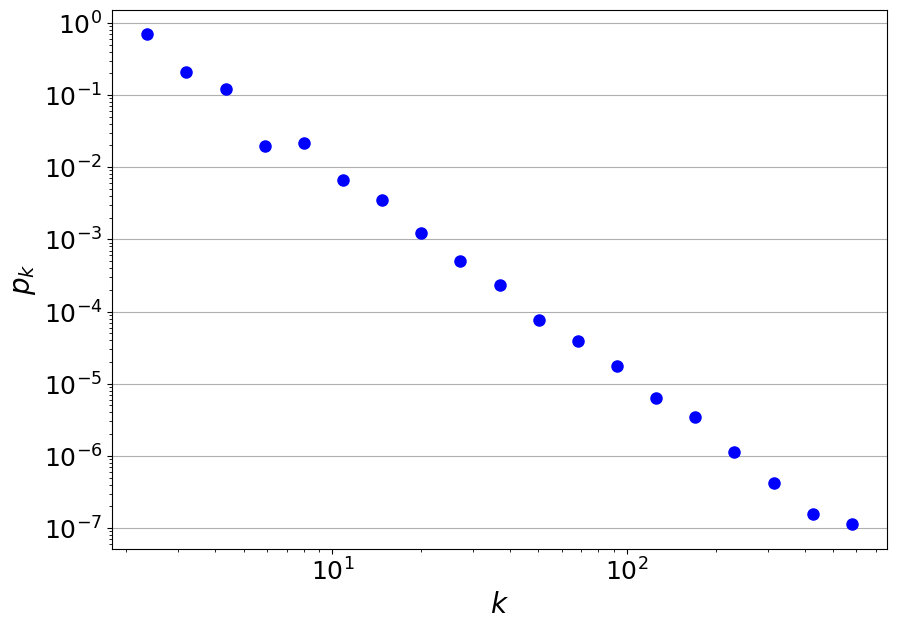

In [6]:
# Plot of the degree distribution
plt.figure(figsize=(10, 7))
plt.loglog(k_delta, p_k_delta, 'bo', markersize=8)

plt.xlabel('$k$', fontsize=20)
plt.ylabel('$p_k$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.grid(axis='y')
plt.show()


#### Network generated with a uniform fitness distribution

In [7]:
# Initialization
network_uniform = model.network(m0, m)
network_uniform.set_fitness_distr('uniform')

In [8]:
# Generate the network
network_uniform.generate_network(n)

# Get the degree distribution of the network
p_k_uniform, k_uniform = network_uniform.get_degree_distr()

In [9]:
# Determine the power-law exponent of the degree distribution

# Remove zero probabilities
x_uniform = np.delete(k_uniform, np.argwhere(p_k_uniform==0))
y_uniform = np.delete(p_k_uniform, np.argwhere(p_k_uniform==0))
# Transform to log scale
x_uniform = np.log10(x_uniform)
y_uniform = np.log10(y_uniform)

# Linear regression (slope is the exponent)
slope_uniform, intercept_uniform, r_value_uniform, _, _ = linregress(x_uniform, y_uniform)

print('The power law exponent of the degree distribution using a uniform fitness distribution is %s'% np.round(-slope_uniform, 3))

The power law exponent of the degree distribution using a uniform fitness distribution is 2.066


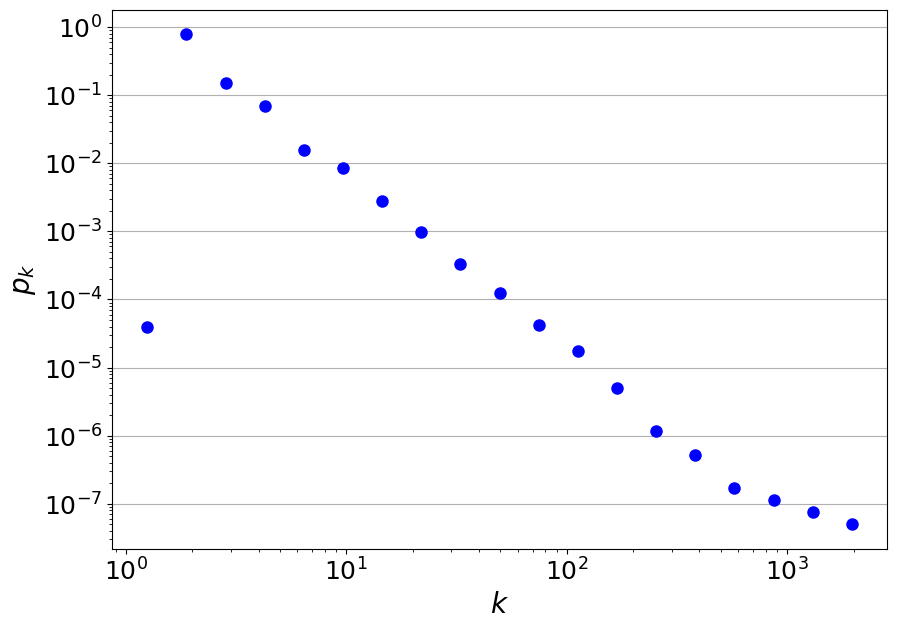

In [10]:
# Plot of the degree distribution
plt.figure(figsize=(10, 7))
plt.loglog(k_uniform, p_k_uniform, 'bo', markersize=8)

plt.xlabel('$k$', fontsize=20)
plt.ylabel('$p_k$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.grid(axis='y')
plt.show()

#### Network generated with an exponential fitness distribution

In [11]:
# Initialization
network_exp = model.network(m0, m)
network_exp.set_fitness_distr('exponential')

In [12]:
# Generate the network
network_exp.generate_network(n)

# Get the degree distribution of the network
p_k_exp, k_exp = network_exp.get_degree_distr()

In [13]:
# Determine the power-law exponent of the degree distribution

# Remove zero probabilities
x_exp = np.delete(k_exp, np.argwhere(p_k_exp==0))
y_exp = np.delete(p_k_exp, np.argwhere(p_k_exp==0))
# Transform to log scale
x_exp = np.log10(x_exp)
y_exp = np.log10(y_exp)

# Linear regression (slope is the exponent)
slope_exp, intercept_exp, r_value_exp, _, _ = linregress(x_exp, y_exp)

print('The power law exponent of the degree distribution using a exponential fitness distribution is %s'% np.round(-slope_exp, 3))


The power law exponent of the degree distribution using a exponential fitness distribution is 2.088


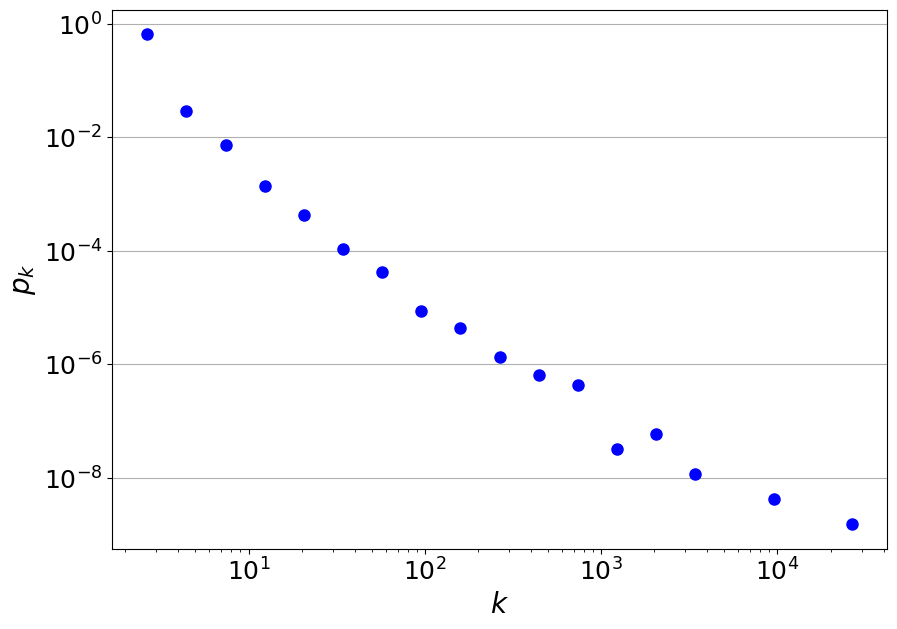

In [14]:
# Plot of the degree distribution
plt.figure(figsize=(10, 7))
plt.loglog(k_exp, p_k_exp, 'bo', markersize=8)

plt.xlabel('$k$', fontsize=20)
plt.ylabel('$p_k$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.grid(axis='y')
plt.show()

#### Comparison of degree distribution

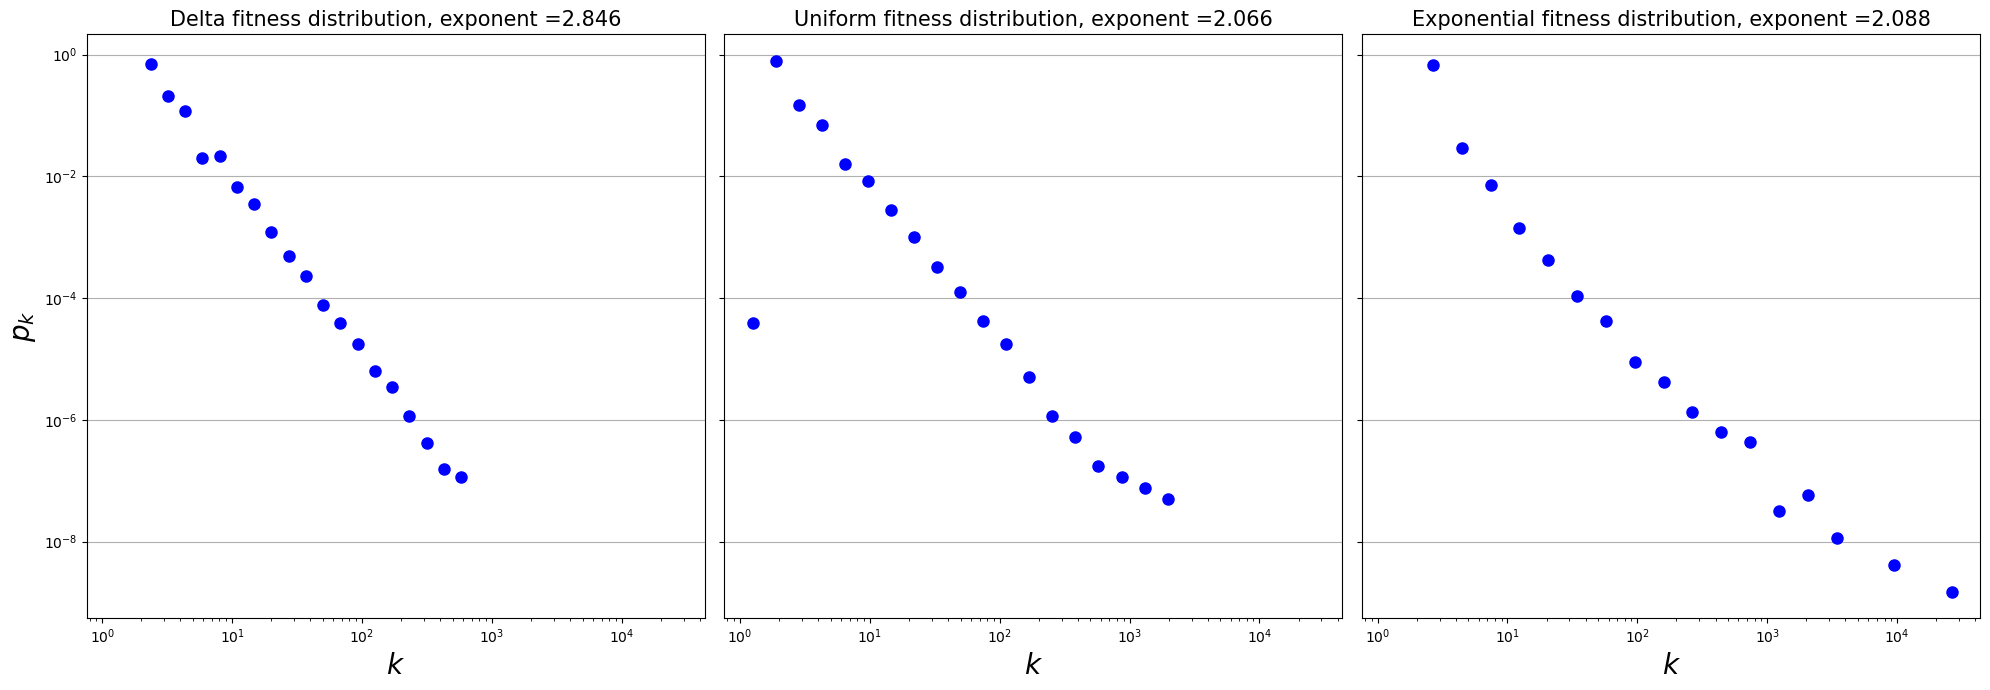

In [15]:
fig, axs = plt.subplots(1,3, figsize = (20,7), sharex=True, sharey=True)

axs[0].set_title('Delta fitness distribution, exponent ='+ str(round(-slope_delta, 3)), fontsize=15)
axs[0].loglog(k_delta, p_k_delta, 'bo', markersize=8)
axs[0].set_ylabel('$p_k$', fontsize=20)
axs[0].set_xlabel('$k$', fontsize=20)

axs[1].set_title('Uniform fitness distribution, exponent ='+ str(round(-slope_uniform, 3)), fontsize=15)
axs[1].loglog(k_uniform, p_k_uniform, 'bo', markersize=8)
axs[1].set_xlabel('$k$', fontsize=20)

axs[2].set_title('Exponential fitness distribution, exponent ='+ str(round(-slope_exp, 3)), fontsize=15)
axs[2].loglog(k_exp, p_k_exp, 'bo', markersize=8)
axs[2].set_xlabel('$k$', fontsize=20)

for ax in axs.flat:
    ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

### Test if powerlaw

In [16]:
network_exp = model.network(m0, m)
network_exp.set_fitness_distr('exponential')
degrees = network_exp.generate_network(n)
l_list = []
for i in range(len(degrees)):
    l = degrees[i][0]
    l_list.append(len(l))

In [17]:
comp_list = ['lognormal', 'exponential', 'lognormal_positive', 'truncated_power_law', 'stretched_exponential']
degree_distribution = l_list

for comparison in comp_list:
    print(comparison)

    fit_powerlaw = powerlaw.Fit(degree_distribution)
    R, p = fit_powerlaw.distribution_compare('power_law', comparison, normalized_ratio=True)

    if R > 0 and p < 0.05:
        print("The degree distribution follows a power law.\n")
    elif R < 0 and p < 0.05:
        print("The degree distribution follows a", comparison, '\n' )
    elif p>0.05:
        print('non significant result \n')

lognormal
Calculating best minimal value for power law fit


C:\Users\a-v-d\anaconda3\lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions


non significant result 

exponential
Calculating best minimal value for power law fit
The degree distribution follows a power law.

lognormal_positive
Calculating best minimal value for power law fit
The degree distribution follows a power law.

truncated_power_law
Calculating best minimal value for power law fit


non significant result 

stretched_exponential
Calculating best minimal value for power law fit
The degree distribution follows a power law.



In [18]:
for comparison in comp_list:

    fit_powerlaw = powerlaw.Fit(p_k_exp)
    R, p = fit_powerlaw.distribution_compare('power_law', comparison, normalized_ratio=True)

    if R > 0 and p < 0.05:
        print("The degree distribution follows a power law.\n")
    elif R < 0 and p < 0.05:
        print("The degree distribution follows a", comparison, '\n' )
    elif p>0.05:
        print('non significant result \n')

Calculating best minimal value for power law fit
non significant result 

Calculating best minimal value for power law fit
The degree distribution follows a power law.

Calculating best minimal value for power law fit
The degree distribution follows a power law.

Calculating best minimal value for power law fit
non significant result 

Calculating best minimal value for power law fit
non significant result 



Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
No valid fits found.
Values less than or equal to 0 in data. Throwing out 0 or negative values
Assuming nested distributions
Values less than or equal to 0 in data. Throwing out 0 or negative values


## testing network properties

In [20]:
ditribution_list = [ 'delta', 'uniform', 'exponential']

for dist in ditribution_list:   
    print('Distirbution:', dist)
    # Initialization
    network_exp = model.network(m0, m)
    network_exp.set_fitness_distr(dist)

    degrees = network_exp.generate_network(n)

    G = nx.Graph()

    # Add nodes
    for node, (edges, fitness) in degrees.items():
        G.add_node(node, fitness=fitness)

    # Add edges
    for node, (edges, fitness) in degrees.items():
        for neighbor in edges:
            G.add_edge(node, neighbor)

    #Check small wordt properties
    avg_path_length = nx.average_shortest_path_length(G)
    print("Average path length:", avg_path_length)

    avg_clustering_coefficient = nx.average_clustering(G)
    print("Average clustering coefficient:", avg_clustering_coefficient)
    
    # Calculate degree centrality
    degree_centrality = nx.degree_centrality(G)

    # Sort nodes by degree centrality in descending order
    sorted_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)

    # Print top 5 highly connected hubs
    print("Highly connected hubs:")
    for node in sorted_nodes[:5]:
        print("Node:", node, "Degree Centrality:", degree_centrality[node])
    
    # Test robustness against targeted attacks
    num_attacks = 10  # Number of hubs to remove
    removed_hubs = sorted_nodes[:num_attacks]

    print("Initial number of connected components:", nx.number_connected_components(G))

    # Remove the targeted hubs
    for hub in removed_hubs:
        G.remove_node(hub)

    print("Number of connected components after attacks:", nx.number_connected_components(G))
    

Distirbution: delta


KeyboardInterrupt: 